# <span style = 'color:purple'> Imports & Settings

#### Imports

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import os

RAW_DATA_PATH = Path('./raw_data')
PREPROC_DATA_PATH = Path('./preproc_data')

%reload_ext autoreload
%autoreload 2


In [ ]:
from roster_lib.preprocessing import *
from roster_lib.clustering.pca import *
from roster_lib.clustering.som import SelfOrganizingMap


#### Settings

In [8]:
use_all_data_from_Ke = False

time_norm = False
perform_PCA = True

colinear_excl = True
scaler_type = "standard" # Can be "standard", "robust", "minmax" or None
perform_som_clustering = True

mpg_thres = 5
minute_per_season_threshold = mpg_thres * 82

# <span style = 'color:cyan'> Data

### 0. Loading

In [9]:
if use_all_data_from_Ke :
    base_df = pd.read_excel('./raw_data/Ke_all_data.xlsx',index_col = "PLAYER")
else :
    base_df = preprocessing(time_norm=time_norm)
initial_n_players = base_df.shape[0]
base_df

,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,%BLK,OPP_PTSOFF_TOV,OPP_PTS2ND_CHANCE,OPP_PTSFB,OPP_PTSPAINT,DEFWS,TOT_MIN,FT/FGA,player,year
id,,,,,,,,,,,,,,,,,,,,,
_2015_Russell Westbrook,OKC,67,34.4,28.1,9.4,22.0,42.6,1.3,4.3,29.9,...,5.2,12.3,9.5,9.3,31.7,0.075,2304.8,0.445455,Russell Westbrook,2015
_2015_James Harden,HOU,81,36.8,27.4,8.0,18.1,44.0,2.6,6.9,37.5,...,21.1,13.9,10.7,11.6,33.3,0.110,2980.8,0.563536,James Harden,2015
_2015_Kevin Durant,OKC,27,33.8,25.4,8.8,17.3,51.0,2.4,5.9,40.3,...,20.7,10.7,8.8,9.1,29.6,0.129,912.6,0.364162,Kevin Durant,2015
_2015_LeBron James,CLE,69,36.1,25.3,9.0,18.5,48.8,1.7,4.9,35.4,...,21.9,11.7,8.8,8.7,32.2,0.116,2490.9,0.416216,LeBron James,2015
_2015_Anthony Davis,NOP,68,36.1,24.4,9.4,17.6,53.5,0.0,0.2,8.3,...,55.7,10.6,9.2,9.7,34.7,0.106,2454.8,0.386364,Anthony Davis,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_2001_Ira Bowman,ATL,3,6.4,0.0,0.0,0.7,0.0,0.0,0.0,0.0,...,0.0,1.3,1.7,1.0,7.3,-0.002,19.2,0.000000,Ira Bowman,2001
_2001_Lari Ketner,IND,3,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.7,0.7,0.0,0.7,0.019,6.0,0.000000,Lari Ketner,2001
_2001_Muggsy Bogues,TOR,3,11.2,0.0,0.0,0.7,0.0,0.0,0.3,0.0,...,0.0,7.0,3.0,2.0,6.7,0.025,33.6,0.000000,Muggsy Bogues,2001


In [10]:
base_df.columns

Index(['TEAM', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%',
       'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK',
       'PF', 'FP', 'DD2', 'TD3', '+/-', 'OFFRTG', 'DEFRTG', 'NETRTG', 'AST%',
       'AST/TO', 'AST_Ratio', 'OREB%', 'DREB%', 'REB%', 'TO_Ratio', 'eFG%',
       'TS%', 'USG%', 'PACE', 'PIE', 'POSS', 'DEF_RTG', '%DREB', 'STL%',
       '%BLK', 'OPP_PTSOFF_TOV', 'OPP_PTS2ND_CHANCE', 'OPP_PTSFB',
       'OPP_PTSPAINT', 'DEFWS', 'TOT_MIN', 'FT/FGA', 'player', 'year'],
      dtype='object')

In [11]:
resp_df = base_df.copy()
resp_df['resp'] = resp_df['GP'] * ( 2* resp_df['FGA'] + resp_df['3PA'] + resp_df['FTA'] )


In [ ]:
df = base_df[base_df['TOT_MIN']>=minute_per_season_threshold].copy()
print(f"Initial n° of players : {initial_n_players} | Analyzed n° of players : {df.shape[0]}")

Initial n° of players : 10999 | Analyzed n° of players : 8120


### 1. VIF

In [ ]:
excl_features = ['player', 'year','TEAM', 'GP']
init_incl_features = [col for col in df.columns if col not in excl_features]

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif


if colinear_excl :
    vif_excl_features = ['DEFRTG','OFFRTG','NETRTG','DEF_RTG','PTS','FGM','eFG%']
else :
    vif_excl_features = []
final_incl_features = [ft for ft in init_incl_features if ft not in vif_excl_features]
print(final_incl_features)

X = df[final_incl_features]
all_vif = pd.DataFrame()
all_vif["features"] = X.columns
all_vif["vif_index"] = [vif(X.values, i) for i in range(X.shape[1])]
round(all_vif.sort_values(by="vif_index", ascending=False), 2)[:10]

['MIN', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2', 'TD3', '+/-', 'AST%', 'AST/TO', 'AST_Ratio', 'OREB%', 'DREB%', 'REB%', 'TO_Ratio', 'TS%', 'USG%', 'PACE', 'PIE', 'POSS', '%DREB', 'STL%', '%BLK', 'OPP_PTSOFF_TOV', 'OPP_PTS2ND_CHANCE', 'OPP_PTSFB', 'OPP_PTSPAINT', 'DEFWS', 'TOT_MIN', 'FT/FGA']


,features,vif_index
26,REB%,10101.16
11,REB,9832.44
25,DREB%,5753.64
10,DREB,5476.70
17,FP,4338.92
41,TOT_MIN,2876.74
32,POSS,2779.48
28,TS%,1952.82
0,MIN,1168.62
2,FG%,1139.57


### 2. Scaling

In [30]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
sc_dict = {"standard" : StandardScaler(), "robust" : RobustScaler(), "minmax":MinMaxScaler()}

if scaler_type is not None :
    for col in final_incl_features :
        scaler = sc_dict[scaler_type]
        df[col] = scaler.fit_transform(df[col].values.reshape(-1,1))
            
df[excl_features + final_incl_features]

,player,year,TEAM,MIN,FGA,FG%,3PM,3PA,3P%,FTM,...,%DREB,STL%,%BLK,OPP_PTSOFF_TOV,OPP_PTS2ND_CHANCE,OPP_PTSFB,OPP_PTSPAINT,DEFWS,TOT_MIN,FT/FGA
id,,,,,,,,,,,,,,,,,,,,,
_2015_Russell Westbrook,Russell Westbrook,2015,OKC,1.281151,3.106325,-0.446661,0.698018,1.074770,0.167005,4.376797,...,0.279574,2.733165,-0.893010,1.523334,1.265605,1.201910,1.445895,0.099361,0.986427,1.166824
_2015_James Harden,James Harden,2015,HOU,1.578779,2.222874,-0.213845,2.403597,2.376117,0.657472,4.863038,...,-0.011222,1.004795,0.064802,2.107749,1.784562,2.165187,1.659681,1.136548,1.910370,2.021848
_2015_Kevin Durant,Kevin Durant,2015,OKC,1.206744,2.041653,0.950234,2.141200,1.875599,0.838170,2.501298,...,0.504280,-0.612578,0.040706,0.938919,0.962881,1.118147,1.165301,1.699592,-0.916403,0.578186
_2015_LeBron James,LeBron James,2015,CLE,1.491971,2.313484,0.584380,1.222811,1.375081,0.521948,2.501298,...,0.292792,1.210931,0.112994,1.304178,0.962881,0.950620,1.512703,1.314351,1.240785,0.955110
_2015_Anthony Davis,Anthony Davis,2015,NOP,1.491971,2.109611,1.365976,-1.007562,-0.977354,-1.226955,2.570761,...,1.574939,1.274357,2.149099,0.902393,1.135866,1.369436,1.846744,1.018012,1.191444,0.738948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_2001_Derrick McKey,Derrick McKey,2001,IND,-1.137078,-1.401539,-0.197216,-0.876363,-0.927302,-0.471893,-1.041311,...,0.120958,2.003761,-0.477356,-1.143059,-1.026451,-1.101580,-1.386768,-0.789656,-0.819635,-0.679467
_2001_Walter McCarty,Walter McCarty,2001,BOS,-2.005160,-1.401539,-1.594110,-0.613967,-0.626991,0.425145,-0.971848,...,0.001996,-0.771144,-0.127965,-1.837052,-1.804885,-1.855449,-2.094934,-1.204531,-1.515872,-0.334659
_2001_Greg Foster,Greg Foster,2001,LAL,-2.079567,-1.401539,-0.529809,-1.007562,-1.027406,0.386424,-1.110774,...,1.376669,-0.549152,0.366001,-2.019682,-1.934624,-1.813567,-1.907872,-1.797209,-1.545121,-1.369084


# <span style = "color:orange">Clustering

### 3. PCA

In [34]:
def find_n_PC(pca_evr,threshold, display_fig = True):
    cs = np.cumsum(pca_evr)
    above = cs >= threshold
    n = above.argmax() +1
    print(f"Threshold {threshold:.2f} reached with {n} Principal Components")
    if display_fig:
        fig, axs = plt.subplots(1,1,figsize = (16,5))
        plt.plot(cs);
        plt.plot([0,n-1],[cs[n-1],cs[n-1]], ls = '-', c = 'red');
        plt.plot([n-1,n-1],[cs[0],cs[n-1]], ls = '-', c = 'red');
        plt.xticks(ticks= range(len(cs)),labels=[i+1 for i in range(len(cs))])
    
    return n

In [32]:
from sklearn.decomposition import PCA

if perform_PCA:
    pca = PCA()
    pca.fit(df[final_incl_features].values)
    W = pca.components_

    W = pd.DataFrame(W.T,
                    index=final_incl_features,
                    columns=[f'PC{i}' for i in range(1, len(final_incl_features)+1)])
    display(W)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43
MIN,0.243213,-0.043114,-0.064515,-0.114493,-0.142099,0.028011,0.023703,-0.051644,-0.015493,0.010815,...,0.048043,-0.275558,-0.167106,0.731810,-0.174166,0.260401,0.077914,-0.115622,0.025659,-0.004516
FGA,0.233187,-0.068217,-0.098217,-0.068830,0.145787,-0.026965,-0.103902,0.011901,0.034276,-0.099510,...,0.234037,0.345667,-0.055206,-0.115314,0.096281,-0.037334,-0.360579,-0.045265,0.019619,0.012747
FG%,0.059535,0.197306,-0.010089,0.244091,0.002439,0.218212,0.384471,-0.105189,0.053949,0.050478,...,0.076697,-0.118295,0.024273,-0.024551,-0.062543,0.023776,-0.036858,-0.010148,0.002580,0.002949
3PM,0.097642,-0.195329,-0.271915,0.124358,0.025872,-0.096358,0.020440,0.223561,-0.184707,0.016845,...,-0.027600,-0.106218,0.674785,0.132236,-0.017130,-0.040705,-0.105695,-0.012580,0.010967,0.006314
3PA,0.100294,-0.201482,-0.252416,0.100032,0.040203,-0.126546,0.002420,0.242775,-0.177436,-0.005429,...,0.047990,0.004285,-0.673802,-0.138752,-0.011792,0.049775,0.068055,0.008603,-0.000354,-0.002604
3P%,0.035085,-0.198091,-0.168996,0.148655,-0.005764,-0.083861,-0.027405,0.052804,0.025192,0.089264,...,-0.000521,0.001822,-0.010741,-0.005408,-0.000685,0.001821,-0.000382,-0.002315,0.000902,0.000140
FTM,0.218387,-0.001872,0.013496,-0.049705,0.304857,0.170755,-0.045550,0.024042,0.084430,-0.017430,...,-0.068616,0.038503,0.035520,-0.123056,-0.639143,0.037068,-0.063415,-0.022580,-0.002176,0.004979
FTA,0.219433,0.031665,0.038507,-0.064994,0.284782,0.162071,-0.035705,0.044917,0.076946,-0.038203,...,0.108113,-0.116018,-0.003152,0.174684,0.685616,-0.012378,-0.067565,-0.007157,0.005132,-0.001371
FT%,0.062645,-0.164279,-0.157180,0.097081,0.149646,0.085510,-0.077543,-0.217941,0.109948,0.131236,...,0.038888,-0.023385,0.009956,0.009020,0.069468,-0.000149,-0.000903,0.000703,0.001032,-0.000017
OREB,0.106344,0.253560,0.015076,-0.040562,-0.093112,-0.043604,0.005509,-0.091390,0.103774,0.051167,...,0.477948,-0.146890,0.039424,-0.137157,-0.091461,-0.058583,-0.057109,-0.012973,0.071235,-0.253509


Threshold 0.95 reached with 16 Principal Components


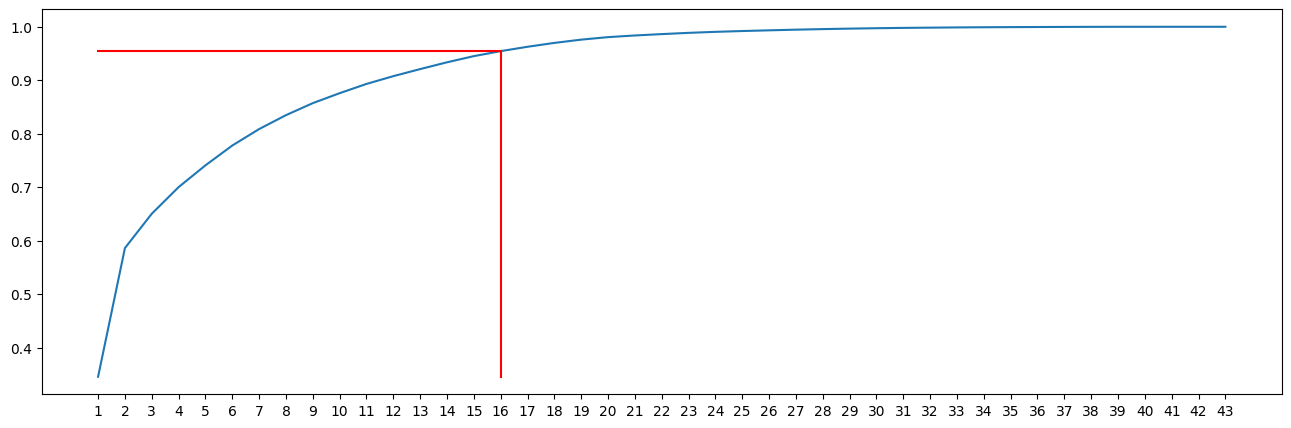

In [35]:
if perform_PCA :
    n_PCA = find_n_PC(pca.explained_variance_ratio_, 0.95)

In [36]:
if perform_PCA:
    final_PCA = PCA(n_components=n_PCA)
    final_PCA.fit(df[final_incl_features].values)
    X_proj = final_PCA.transform(df[final_incl_features].values)
    X_proj = df[excl_features].reset_index(drop=True).merge(pd.DataFrame(X_proj, columns=[f'PC{i+1}' for i in range(n_PCA)]), left_index=True, right_index=True)
else :
    X_proj = df[excl_features].reset_index(drop=True).merge(df[final_incl_features].reset_index(drop=True), left_index=True, right_index=True)

X_proj

,player,year,TEAM,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,Russell Westbrook,2015,OKC,11.380354,-2.096047,5.065850,1.749838,5.335959,-2.152966,-1.739794,2.368564,-1.419132,3.727183,4.135353,-1.473818,0.325142,1.059874,-0.403306,0.916884
1,James Harden,2015,HOU,11.213853,-2.674047,1.485753,1.000497,3.702831,1.091329,-0.010553,2.115711,-1.095678,0.707939,0.956198,-0.235369,1.391882,-0.839387,-0.415329,-0.172405
2,Kevin Durant,2015,OKC,6.141920,-0.832932,-1.354061,3.244491,3.067254,1.064075,-0.630206,0.992963,-0.459476,-1.675686,-1.308437,0.532757,-0.372165,-0.867077,-0.496597,-0.393483
3,LeBron James,2015,CLE,8.833338,-1.801624,2.491499,1.853469,2.189627,1.043846,-1.140345,1.462566,-0.741133,-0.563998,0.188941,0.058778,-1.008591,-1.104511,0.141288,-0.337884
4,Anthony Davis,2015,NOP,8.521192,5.229121,-0.024889,1.740245,0.045300,0.272241,-1.703177,-0.394676,3.073019,-2.551539,1.836674,-1.569609,1.201168,-0.199611,0.108046,-1.523113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8115,Derrick McKey,2001,IND,-4.593505,0.002743,2.650111,-0.505684,-1.388665,-0.050880,0.153773,0.682992,0.314561,1.261236,-1.427960,-0.990802,0.350615,0.353310,-0.178381,-0.444351
8116,Walter McCarty,2001,BOS,-6.606496,-0.749616,0.294711,0.961813,0.934821,-1.201484,-0.661121,-0.317105,-0.215269,-0.419319,0.022852,0.753505,1.359104,0.817123,0.533223,0.474868
8117,Greg Foster,2001,LAL,-6.659804,1.367322,0.898365,0.236074,0.969490,-1.534414,-1.753603,-0.825347,0.065518,0.159502,-1.014919,-0.817332,-0.441060,-0.724159,0.296685,0.057858
8118,Mark Madsen,2001,LAL,-6.356298,1.271440,-0.695521,0.794811,0.705131,0.175034,0.562604,-0.592552,-0.990488,1.412757,-1.315953,-0.495297,0.225577,-0.898370,4.096215,1.731040


### 4. Clustering

#### kmeans & HAC

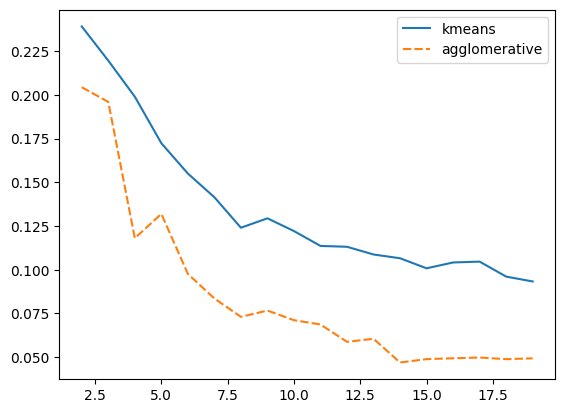

In [37]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

clustering_methods = {
    'kmeans' : KMeans,
    'agglomerative': AgglomerativeClustering    
}
clustering_silhouettes = pd.DataFrame(index = range(1,20), columns = clustering_methods.keys())
X_clust = X_proj[[col for col in X_proj.columns if col not in excl_features]].values

for k in range(2,20):
    for name, object in clustering_methods.items():
        clustering = object(n_clusters= k).fit(X_clust) if name == 'kmeans' else object(n_clusters= k, linkage= 'ward').fit(X_clust)
        labels = clustering.labels_
        clustering_silhouettes.loc[k,name] = silhouette_score(X_clust, labels) if k >1 else 0

sns.lineplot(data=clustering_silhouettes);
    

#### HDBSCAN

In [47]:
from sklearn.cluster import HDBSCAN

hdb = HDBSCAN()
hdb.fit(X_clust)
hdb.labels_

array([-1,  3, -1, ...,  3, -1,  3], shape=(8120,))

In [52]:
pd.Series(hdb.labels_).value_counts()

 3    7533
-1     564
 0       7
 2       6
 1       5
 4       5
Name: count, dtype: int64

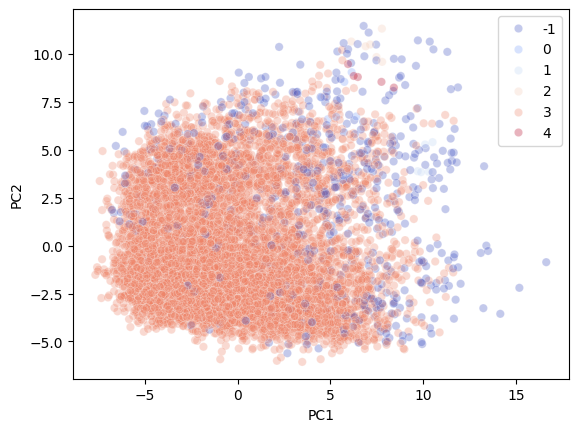

In [51]:
sns.scatterplot(x = X_proj['PC1'], y = X_proj['PC2'], hue = hdb.labels_, palette = 'coolwarm', alpha = 0.3);

#### SOM

In [68]:
if perform_som_clustering :

    som = SelfOrganizingMap(map_size=(4,4), input_dim= n_PCA, learning_rate=1, sigma=0.2)
    som.train(X_clust, epochs=120)
    som_clust = som.predict(X_clust)

Epoch   12 /  120, Learning Rate: 9.124e-01, Sigma: 1.825e-01 Silhouette Score: 5.439e-02
Epoch   24 /  120, Learning Rate: 8.256e-01, Sigma: 1.651e-01 Silhouette Score: 5.942e-02
Epoch   36 /  120, Learning Rate: 7.470e-01, Sigma: 1.494e-01 Silhouette Score: 9.145e-02
Epoch   48 /  120, Learning Rate: 6.759e-01, Sigma: 1.352e-01 Silhouette Score: 8.142e-02
Epoch   60 /  120, Learning Rate: 6.116e-01, Sigma: 1.223e-01 Silhouette Score: 7.550e-02
Epoch   72 /  120, Learning Rate: 5.534e-01, Sigma: 1.107e-01 Silhouette Score: 8.975e-02
Epoch   84 /  120, Learning Rate: 5.007e-01, Sigma: 1.001e-01 Silhouette Score: 8.646e-02
Epoch   96 /  120, Learning Rate: 4.531e-01, Sigma: 9.062e-02 Silhouette Score: 7.999e-02
Epoch  108 /  120, Learning Rate: 4.100e-01, Sigma: 8.199e-02 Silhouette Score: 8.250e-02
Epoch  120 /  120, Learning Rate: 3.710e-01, Sigma: 7.419e-02 Silhouette Score: 8.180e-02


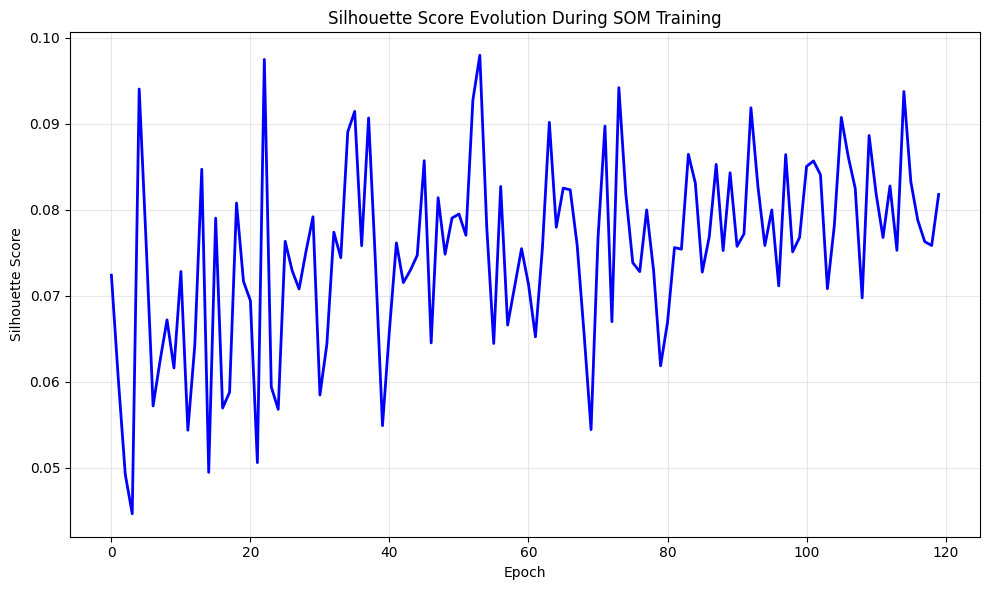

Maximum silhouette score: 0.0980 at epoch 54
Final silhouette score: 0.0818


In [69]:
if perform_som_clustering :
    som.plot_silhouette_evolution()

In [ ]:
if perform_som_clustering :
    pd.Series(som_clust).value_counts()

8     725
5     697
9     641
4     609
10    602
12    588
13    583
0     556
2     550
6     514
1     483
14    453
11    396
7     340
3     318
15     65
Name: count, dtype: int64

In [45]:
if perform_som_clustering : 
    som_silhhouette = silhouette_score(X_clust, som_clust)
    print(som_silhhouette)

0.09457589721129973


# <span style = 'color:pink'>States & Transitions


In [67]:
resp_df

,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,OPP_PTSOFF_TOV,OPP_PTS2ND_CHANCE,OPP_PTSFB,OPP_PTSPAINT,DEFWS,TOT_MIN,FT/FGA,player,year,resp
id,,,,,,,,,,,,,,,,,,,,,
_2015_Russell Westbrook,OKC,67,34.4,28.1,9.4,22.0,42.6,1.3,4.3,29.9,...,12.3,9.5,9.3,31.7,0.075,2304.8,0.445455,Russell Westbrook,2015,3892.7
_2015_James Harden,HOU,81,36.8,27.4,8.0,18.1,44.0,2.6,6.9,37.5,...,13.9,10.7,11.6,33.3,0.110,2980.8,0.563536,James Harden,2015,4317.3
_2015_Kevin Durant,OKC,27,33.8,25.4,8.8,17.3,51.0,2.4,5.9,40.3,...,10.7,8.8,9.1,29.6,0.129,912.6,0.364162,Kevin Durant,2015,1263.6
_2015_LeBron James,CLE,69,36.1,25.3,9.0,18.5,48.8,1.7,4.9,35.4,...,11.7,8.8,8.7,32.2,0.116,2490.9,0.416216,LeBron James,2015,3422.4
_2015_Anthony Davis,NOP,68,36.1,24.4,9.4,17.6,53.5,0.0,0.2,8.3,...,10.6,9.2,9.7,34.7,0.106,2454.8,0.386364,Anthony Davis,2015,2869.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_2001_Ira Bowman,ATL,3,6.4,0.0,0.0,0.7,0.0,0.0,0.0,0.0,...,1.3,1.7,1.0,7.3,-0.002,19.2,0.000000,Ira Bowman,2001,4.2
_2001_Lari Ketner,IND,3,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.7,0.7,0.0,0.7,0.019,6.0,0.000000,Lari Ketner,2001,0.0
_2001_Muggsy Bogues,TOR,3,11.2,0.0,0.0,0.7,0.0,0.0,0.3,0.0,...,7.0,3.0,2.0,6.7,0.025,33.6,0.000000,Muggsy Bogues,2001,5.1


In [78]:
resp_df[(resp_df['year']==2014)&(resp_df['TEAM']=='SAS')][['player','resp','TOT_MIN']].T.to_dict().values()

dict_values([{'player': 'Tony Parker', 'resp': 2135.2000000000003, 'TOT_MIN': 1999.1999999999998}, {'player': 'Tim Duncan', 'resp': 2131.2000000000003, 'TOT_MIN': 2160.7999999999997}, {'player': 'Kawhi Leonard', 'resp': 1603.8, 'TOT_MIN': 1920.6000000000001}, {'player': 'Manu Ginobili', 'resp': 1700.0, 'TOT_MIN': 1550.4}, {'player': 'Marco Belinelli', 'resp': 1816.0, 'TOT_MIN': 2016.0}, {'player': 'Patty Mills', 'resp': 1725.2999999999997, 'TOT_MIN': 1530.8999999999999}, {'player': 'Danny Green', 'resp': 1387.1999999999998, 'TOT_MIN': 1652.4}, {'player': 'Boris Diaw', 'resp': 1358.8, 'TOT_MIN': 1975.0}, {'player': 'Tiago Splitter', 'resp': 873.2, 'TOT_MIN': 1268.5}, {'player': 'Cory Joseph', 'resp': 666.4000000000001, 'TOT_MIN': 938.4000000000001}, {'player': 'Jeff Ayres', 'resp': 408.79999999999995, 'TOT_MIN': 949.0}, {'player': 'Matt Bonner', 'resp': 439.2, 'TOT_MIN': 689.3000000000001}, {'player': 'Aron Baynes', 'resp': 349.8, 'TOT_MIN': 492.90000000000003}, {'player': 'Austin Daye'

In [69]:
resp_df['year'] = resp_df['year'].astype(int)

In [70]:

agg_rdf = resp_df.groupby(['TEAM','year']).sum()[['TOT_MIN','resp']]
agg_rdf

TOT_MIN     resp
TEAM year                  
ATL  2000  19491.2  16205.5
     2001  17501.5  14796.3
     2002  19784.1  16351.7
     2003  19842.0  15967.4
     2004  15302.3  12334.5
...            ...      ...
WAS  2018  20021.7  18140.4
     2019  19373.8  18864.8
     2020  17920.4  17479.8
     2021  17200.1  16742.3
     2022  18539.8  17294.5

[685 rows x 2 columns]

In [ ]:
resp_dict = {}
for (tm, yr), row in agg_rdf.iterrows():
    _tmp_data = pd.DataFrame(resp_df[(resp_df['year']== yr)&(resp_df['TEAM']== tm)][['player','resp','TOT_MIN']].T.to_dict().values()).set_index('player')
    _tmp_data = _tmp_data / _tmp_data.sum()    
    resp_dict[f"{tm}_{yr}"] = {'data' : _tmp_data, 'resp': _tmp_data['resp'].std(), 'min' : _tmp_data['TOT_MIN'].std()}
    

resp_dict['SAS_2014']['data']

,resp,TOT_MIN
player,,
Tony Parker,0.127082,0.103364
Tim Duncan,0.126844,0.111719
Kawhi Leonard,0.095455,0.099300
Manu Ginobili,0.101180,0.080160
Marco Belinelli,0.108084,0.104233
Patty Mills,0.102686,0.079152
Danny Green,0.082563,0.085434
Boris Diaw,0.080873,0.102113
Tiago Splitter,0.051971,0.065585


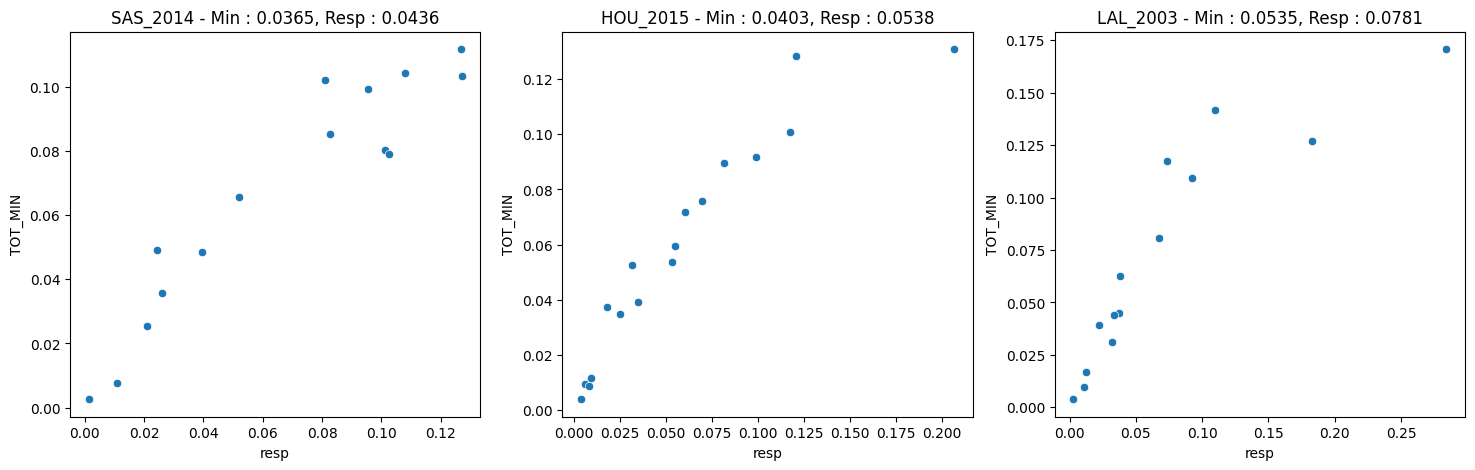

In [72]:
fig, axs = plt.subplots(1,3,figsize = (18,5))

tm_1 = 'SAS_2014'
tm_2 = 'HOU_2015'
tm_3 = 'LAL_2003'

sns.scatterplot(data = resp_dict[tm_1]['data'], x = 'resp', y = 'TOT_MIN', ax = axs[0]);
axs[0].set_title(f"{tm_1} - Min : {resp_dict[tm_1]['min']:.4f}, Resp : {resp_dict[tm_1]['resp']:.4f}");
sns.scatterplot(data = resp_dict[tm_2]['data'], x = 'resp', y = 'TOT_MIN', ax = axs[1]);
axs[1].set_title(f"{tm_2} - Min : {resp_dict[tm_2]['min']:.4f}, Resp : {resp_dict[tm_2]['resp']:.4f}");
sns.scatterplot(data = resp_dict[tm_3]['data'], x = 'resp', y = 'TOT_MIN', ax = axs[2]);
axs[2].set_title(f"{tm_3} - Min : {resp_dict[tm_3]['min']:.4f}, Resp : {resp_dict[tm_3]['resp']:.4f}");


In [73]:
success_df = pd.read_csv(PREPROC_DATA_PATH / 'team_success.csv').set_index(['TEAM','YEAR'])
success_df

,,win_rate,csf
TEAM,YEAR,,
IND,2000,0.683,1
MIA,2000,0.634,1
NYK,2000,0.610,1
PHI,2000,0.598,1
NOP,2000,0.598,0
...,...,...,...
LAL,2022,0.402,0
SAC,2022,0.366,0
POR,2022,0.329,0


In [82]:
success_df['min'] = np.nan
success_df['resp'] = np.nan
for (tm,yr) in success_df.index :
    try :
        success_df.loc[(tm,yr),'min'] = resp_dict[f"{tm}_{yr}"]['min']
        success_df.loc[(tm,yr),'resp'] = resp_dict[f"{tm}_{yr}"]['resp']
    except :
        print(f"Team {tm} is missing for year {yr}")
success_df

Team NOP is missing for year 2000
Team BKN is missing for year 2000
Team OKC is missing for year 2000
Team MEM is missing for year 2000
Team NOP is missing for year 2001
Team BKN is missing for year 2001
Team OKC is missing for year 2001
Team MEM is missing for year 2001
Team BKN is missing for year 2002
Team NOP is missing for year 2002
Team OKC is missing for year 2002
Team BKN is missing for year 2003
Team NOP is missing for year 2003
Team OKC is missing for year 2003
Team BKN is missing for year 2004
Team NOP is missing for year 2004
Team OKC is missing for year 2004
Team BKN is missing for year 2005
Team OKC is missing for year 2005
Team NOP is missing for year 2005
Team BKN is missing for year 2006
Team NOP is missing for year 2006
Team OKC is missing for year 2006
Team BKN is missing for year 2007
Team NOP is missing for year 2007
Team OKC is missing for year 2007
Team BKN is missing for year 2008
Team NOP is missing for year 2008
Team OKC is missing for year 2008
Team BKN is mi

,,win_rate,csf,min,resp
TEAM,YEAR,,,,
IND,2000,0.683,1,0.051210,0.057198
MIA,2000,0.634,1,0.047798,0.056682
NYK,2000,0.610,1,0.056292,0.067697
PHI,2000,0.598,1,0.059076,0.074125
NOP,2000,0.598,0,NaN,NaN
...,...,...,...,...,...
LAL,2022,0.402,0,0.041245,0.052202
SAC,2022,0.366,0,0.038279,0.042249
POR,2022,0.329,0,0.026986,0.031619


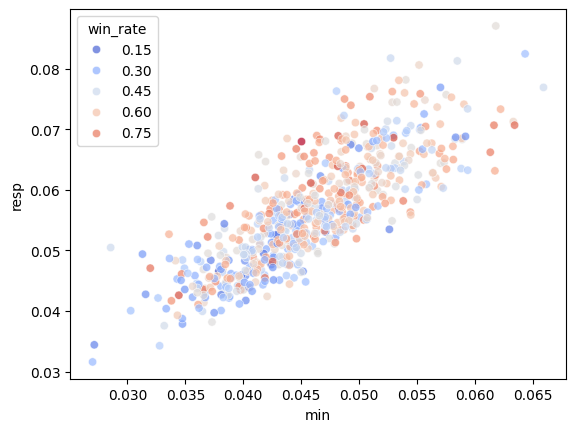

In [85]:
sns.scatterplot(data= success_df, x = 'min',y= 'resp', hue = 'win_rate', alpha = 0.7, palette = 'coolwarm');